In [103]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle



In [100]:
# class arguments():
# #     def __init(self, cond_block_str):
# #         self.cond_block = cond_block_str
        
#     SAVE_EPOCH_ROOT = '../../data/version5.2/preprocessed/epochs/aft_ICA_rej/'
#     SAVE_RESULT_ROOT = '../../results/ERPs/'
#     cond_filter ='none' # {none,non_symm}
# #     cond_block = cond_block_str #'early' #{early,later}
#     cond_time = 'prestim' #{prestim,poststim}
#     cond_decoding = 'none' #{none,removeevoked,resampled}
#     subj_num = 1
    
#     applyBaseline_bool = 1
#     pre_tmin = -0.4
#     pre_tmax = 0.05
#     post_tmin = 0.05
#     post_tmax = 0.45
#     num_classes = 2
#     normalization_type = 'normal'# {normal,lstmPaper}
#     gen_rand_perm = 0
#     null_max_iter = 10000
#     loop_null_iter = 5
#     gen_decoder_scores = 1
#     n_splits = 5
#     random_state = 42 
#     max_iter = 10000
#     n_jobs = 1
#     scoring = 'roc_auc'
#     mtdt_feat = 'Trgt_Loc_main'
#     smooth_lvl = 55

# args = arguments()
# args.cond_block='early'



In [ ]:
class arguments:
    def __init__(self, cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels):
        self.cond_block = cond_block #'later' #{early,later}
        self.cond_decoding = cond_decoding #'removeevoked' #{none,removeevoked,resampled}
        self.applyBaseline_bool = applyBaseline_bool #'False'
        self.mtdt_feat = mtdt_feat
        self.occ_channels = occ_channels
        
        

        self.SAVE_EPOCH_ROOT = '../../data/version5.2/preprocessed/epochs/aft_ICA_rej/'
        self.SAVE_RESULT_ROOT = '../../results/autocorr/eCortex/'
        self.cond_filter ='none' # {none,non_symm}
        self.cond_time = 'prestim' #{prestim,poststim}
        self.subj_num = 1
        self.pre_tmin = -0.4
        self.pre_tmax = 0.05
        self.post_tmin = 0.05
        self.post_tmax = 0.45
        self.num_classes = 2
        self.normalization_type = 'normal'# {normal,lstmPaper}
        self.gen_rand_perm = 0
        self.null_max_iter = 10000
        self.loop_null_iter = 5
        self.gen_decoder_scores = 1
        self.random_state = 42 
        self.max_iter = 10000
        self.n_jobs = 1
        self.scoring = 'roc_auc'
        self.n_splits = 100
        self.folder='noneFilter_PrePost_decod%s_bsline%s%s/' %(cond_decoding, \
                                                       applyBaseline_bool, \
                                                       n_splits)
        
#         self.SAVE_RESULT_ROOT = self.SAVE_RESULT_ROOT + self.folder
        print(self.SAVE_RESULT_ROOT)




# Autocorrelation

In [17]:
# # https://stackoverflow.com/questions/30143417/computing-the-correlation-coefficient-between-two-multi-dimensional-arrays
# def generate_correlation_map(x, y):
#     """Correlate each n with each m.

#     Parameters
#     ----------
#     x : np.array
#       Shape N X T.

#     y : np.array
#       Shape M X T.

#     Returns
#     -------
#     np.array
#       N X M array in which each element is a correlation coefficient.

#     """
#     mu_x = x.mean(1)
#     mu_y = y.mean(1)
#     n = x.shape[1]
#     if n != y.shape[1]:
#         raise ValueError('x and y must ' +
#                          'have the same number of timepoints.')
#     s_x = x.std(1, ddof=n - 1)
#     s_y = y.std(1, ddof=n - 1)
#     cov = np.dot(x,
#                  y.T) - n * np.dot(mu_x[:, np.newaxis],
#                                   mu_y[np.newaxis, :])
#     return cov / np.dot(s_x[:, np.newaxis], s_y[np.newaxis, :])

In [18]:
def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax):
    
    font=set_fonts()
    fsize_t=30
    fsize_x=26
    
    # EARLY ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_e[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_e[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_e[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_e[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Testing Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_e = np.mean(avgmap_e, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_e, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'earlyBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()
    
    # LATER ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_l[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_l[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_l[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_l[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_l = np.mean(avgmap_l, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_l, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'laterBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()


    plt.show()

In [ ]:
def combine_subj_scores(args, subj_p1, subj_p2):

    ERP_p1=[]
    ERP_p2=[]

    for subj_id in selected_subj_P1:
        main_ptrn = 1
        args.subj_num = subj_id

        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)

        ERP_p1.append(erps)


    for subj_id in selected_subj_P2:
        main_ptrn = 2
        args.subj_num = subj_id

        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)


        ERP_p2.append(erps)
        


    print('p1 subjects:',np.asarray(avgp1_autcrr).shape)
    print('p2 subjects', np.asarray(avgp2_autcrr).shape)

    p1=np.asarray(ERP_p1)
    p2=np.asarray(ERP_p2)
    p=np.concatenate((p1, p2), axis=0)

    return p

In [ ]:
selected_subj_P1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 16, \
                    42, 43, 44, 45, 47, 48, 51, 52, 53, \
                    55, 56, 57, 58, 59, 60, 61, 62, 63, 64, \
                    66, 67, 68, 69, 71, 72, 73, 74]
selected_subj_P2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
                   31, 32, 33, 34, 35, 36, 38, 39]

# Conditions

In [ ]:
# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'none', 'False', 'Trgt_Loc_main', 'False' )
map_e = combine_subj_scores(args, selected_subj_P1, selected_subj_P2)
print('p early all subjects:',map_e.shape)

# late ------------- #
args = arguments('later', 'none', 'False', 'Trgt_Loc_main', 'False' )
map_l = combine_subj_scores(args, selected_subj_P1, selected_subj_P2)
print('p later all subjects:',map_l.shape)

# diff ------------- #
map_d = map_l - map_e
print('p diff all subjects:',map_d.shape)

# avgmap_e = np.mean(map_e, axis=0)
# avgmap_l = np.mean(map_l, axis=0)
# avgmap_d = np.mean(map_d, axis=0)

# #  plot ------------- #
# vmin=-0.05
# vmax=0.05
# title='noneFilterNoBasline'
# plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)

In [125]:
# picks_back_brain = ['E56', 'E63', 'E68', 'E73', 'E81', 'E88', 'E94', 'E99', 'E107',
#                     'E57', 'E64', 'E69', 'E74', 'E82', 'E89', 'E95', 'E100',
#                     'E50', 'E58', 'E65', 'E70', 'E75', 'E83', 'E90', 'E96', 'E101',
#                     'E51', 'E59', 'E66', 'E71', 'E76', 'E84', 'E91', 'E97',
#                     'E52', 'E60', 'E67', 'E72', 'E77', 'E85', 'E92'
#                     'E53', 'E61', 'E62', 'E78','E86'
#                     ]
# aa0 = aa[0].copy().pick_types(eeg=True, selection=picks_back_brain)

/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


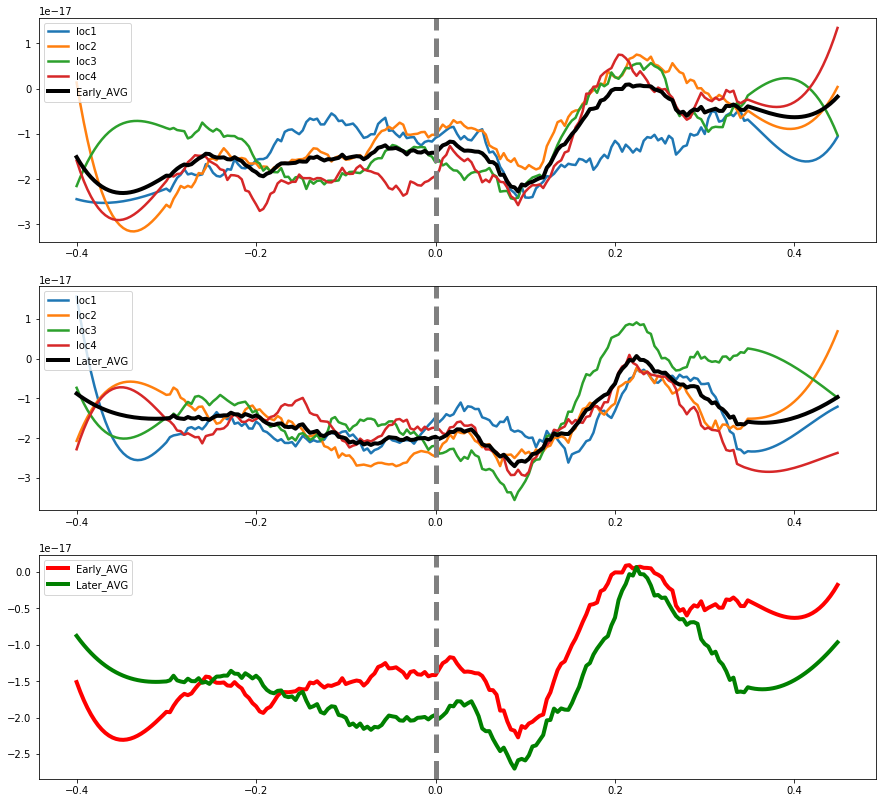

In [50]:
from scipy.signal import savgol_filter
import matplotlib.pylab as plt


fig, ax = plt.subplots(3,1,figsize=(15,14))

# window_length : int
# The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer.
# polyorder : int
# The order of the polynomial used to fit the samples. polyorder must be less than window_length.

# smooth_level = 11 # 11 * 4 = 45 ms
# smooth_level = 15 # 15 * 4 = 60 ms
# smooth_level = 25 # 25 * 4 = 100 ms
smooth_level = 51 # 51 * 4 = 204 ms

ply_order = 3
lw1=2.5
lw2=4

# window_length, polyorder

evk_data = np.mean(avgact_e, axis=1)
smooth_evk1 = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2 = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3 = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4 = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_e = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 
ax[0].plot(subset.times, smooth_evk1, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk2, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk3, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk4, linewidth=lw1)
ax[0].plot(subset.times, smooth_evkavg_e, color='black', linewidth=lw2)

ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')



evk_data = np.mean(avgact_l, axis=1)
smooth_evk1 = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2 = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3 = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4 = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_l = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 

ax[1].plot(subset.times, smooth_evk1, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk2, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk3, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk4, linewidth=lw1)
ax[1].plot(subset.times, smooth_evkavg_l, color='black', linewidth=lw2)

ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')
# plt.xticks(subset.times*1000)

ax[2].plot(subset.times, smooth_evkavg_e, color='red', linewidth=lw2)
ax[2].plot(subset.times, smooth_evkavg_l, color='green', linewidth=lw2)
ax[2].legend(['Early_AVG', 'Later_AVG'], loc='upper left')

for ii in range(3):
    ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
plt.show()

/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


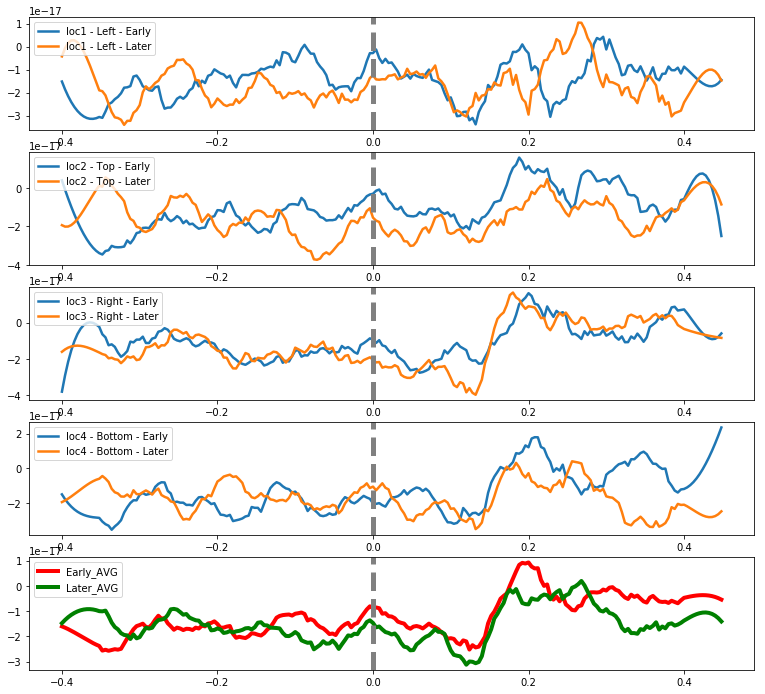

In [52]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(5,1,figsize=(13,12))

# window_length : int
# The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer.
# polyorder : int
# The order of the polynomial used to fit the samples. polyorder must be less than window_length.

# smooth_level = 11 # 11 * 4 = 45 ms
# smooth_level = 15 # 15 * 4 = 60 ms
smooth_level = 25 # 25 * 4 = 100 ms
# smooth_level = 51 # 51 * 4 = 204 ms

ply_order = 3
lw1=2.5
lw2=4

# window_length, polyorder

evk_data = np.mean(avgact_e, axis=1)
smooth_evk1_e = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2_e = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3_e = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4_e = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_e = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 


evk_data = np.mean(avgact_l, axis=1)
smooth_evk1_l = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2_l = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3_l = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4_l = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_l = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 





ax[0].plot(subset.times, smooth_evk1_e, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk1_l, linewidth=lw1)
ax[0].legend(['loc1 - Left - Early', 'loc1 - Left - Later'], loc='upper left')

ax[1].plot(subset.times, smooth_evk2_e, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk2_l, linewidth=lw1)
ax[1].legend(['loc2 - Top - Early', 'loc2 - Top - Later'], loc='upper left')

ax[2].plot(subset.times, smooth_evk3_e, linewidth=lw1)
ax[2].plot(subset.times, smooth_evk3_l, linewidth=lw1)
ax[2].legend(['loc3 - Right - Early', 'loc3 - Right - Later'], loc='upper left')

ax[3].plot(subset.times, smooth_evk4_e, linewidth=lw1)
ax[3].plot(subset.times, smooth_evk4_l, linewidth=lw1)
ax[3].legend(['loc4 - Bottom - Early', 'loc4 - Bottom - Later'], loc='upper left')


ax[4].plot(subset.times, smooth_evkavg_e, color='red', linewidth=lw2)
ax[4].plot(subset.times, smooth_evkavg_l, color='green', linewidth=lw2)
ax[4].legend(['Early_AVG', 'Later_AVG'], loc='upper left')


for ii in range(5):
    ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
plt.show()

In [55]:
avgE = Grps_dt.copy()
avgact_e = np.mean(Grps_dt, axis=1)

avgL = Grps_dt_l.copy()
avgact_l = np.mean(Grps_dt_l, axis=1)

avgactchan_e = np.mean(avgact_e, axis=1)
avgactchan_l = np.mean(avgact_l, axis=1)

subset = Grp1.copy()

print(avgact_e.shape)
print(avgact_l.shape)

print(avgactchan_e.shape)
print(avgactchan_l.shape)

(4, 129, 213)
(4, 129, 213)
(4, 213)
(4, 213)


In [82]:
from sklearn.metrics.pairwise import cosine_similarity
mapr_e = np.zeros((4, avgactchan_e.shape[1], avgactchan_e.shape[1]))
mapr_l = np.zeros((4, avgactchan_l.shape[1], avgactchan_l.shape[1]))

mapr_e[0,:,:] = cosine_similarity(X=avgact_e[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=avgact_e[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=avgact_e[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=avgact_e[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=avgact_l[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=avgact_l[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=avgact_l[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=avgact_l[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e

In [83]:
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)


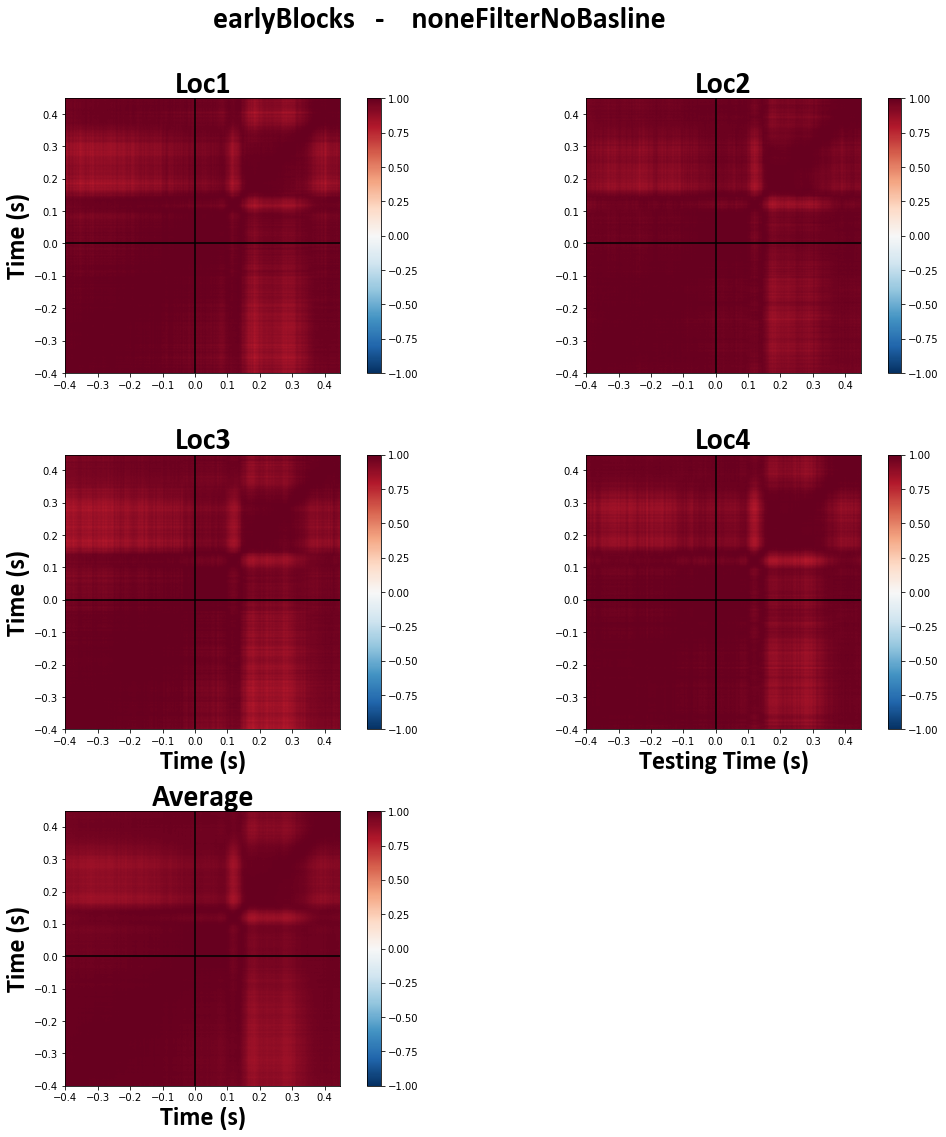

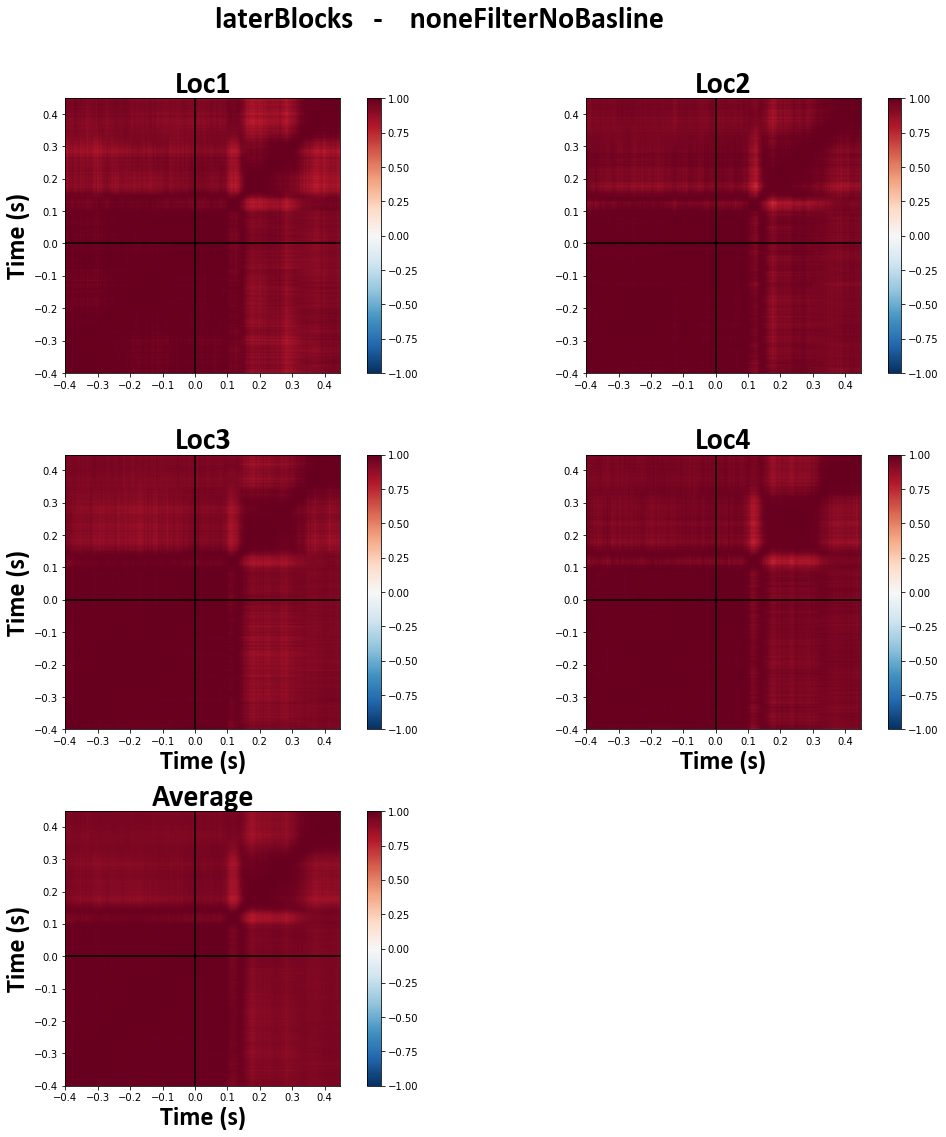

In [91]:
#  plot ------------- #
vmin=-1
vmax=1
title='noneFilterNoBasline'

# print(avgmap_e.shape)
# fig, axs = plt.subplots(2, 2, figsize=(15,15))
# ax = axs[0][0]
# im = ax.imshow(avgmap_e[0,:,:], origin='lower', cmap='RdBu_r',  vmin=vmin, vmax=vmax)#, interpolation='lanczos', origin='lower', cmap='RdBu_r', vmin=vmin, vmax=vmax)
# 
plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)